In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [2]:
#ура индусский код

cols = ["dna_chr", "dna_start", "dna_end", "rna_chr", "rna_start",
           "rna_end", "rna_strand", "rna_name", "rna_type", "bardic_pval",
           "bardic_qval", "macs_pval", "macs_qval", "piranha_pval",
           "piranha_qval", "dna_intersect", "rna_intersect", "scaling_weight"]

ezh2_rad = pd.read_table("radicl_unfiltered/EZH2.radicl2FA_mESC.bed.eCLIP.mESC.bed", header=None, names=cols)
ezh2_rad["HMQ"] = 3 / ((1/ezh2_rad.bardic_qval) + (1/ezh2_rad.piranha_qval) + (1/ezh2_rad.macs_qval))
ezh2_rad["experiment"] = "radicl_2FA_mESC"
ezh2_rad["protein"] = "EZH2"

ezh2_grid = pd.read_table("EZH2.grid_mESC.bed.eCLIP.mESC.bed", header=None, names=cols)
ezh2_grid["HMQ"] = 3 / ((1/ezh2_grid.bardic_qval) + (1/ezh2_grid.piranha_qval) + (1/ezh2_grid.macs_qval))
ezh2_grid["experiment"] = "grid_mESC"
ezh2_grid["protein"] = "EZH2"

hnrnpk_rad = pd.read_table("radicl_unfiltered/HNRNPK.radicl2FA_mESC.bed.eCLIP.mESC.bed", header=None, names=cols)
hnrnpk_rad["HMQ"] = 3 / ((1/hnrnpk_rad.bardic_qval) + (1/hnrnpk_rad.piranha_qval) + (1/hnrnpk_rad.macs_qval))
hnrnpk_rad["experiment"] = "radicl_2FA_mESC"
hnrnpk_rad["protein"] = "HNRNPK"

hnrnpk_grid = pd.read_table("HNRNPK.grid_mESC.bed.eCLIP.mESC.bed", header=None, names=cols)
hnrnpk_grid["HMQ"] = 3 / ((1/hnrnpk_grid.bardic_qval) + (1/hnrnpk_grid.piranha_qval) + (1/hnrnpk_grid.macs_qval))
hnrnpk_grid["experiment"] = "grid_mESC"
hnrnpk_grid["protein"] = "HNRNPK"

suz12_rad = pd.read_table("radicl_unfiltered/SUZ12.radicl2FA_mESC.bed.INTERSECTION.mESC.bed", header=None, names=cols)
suz12_rad["HMQ"] = 3 / ((1/suz12_rad.bardic_qval) + (1/suz12_rad.piranha_qval) + (1/suz12_rad.macs_qval))
suz12_rad["experiment"] = "radicl_2FA_mESC"
suz12_rad["protein"] = "SUZ12"

suz12_grid = pd.read_table("SUZ12.grid_mESC.bed.INTERSECTION.mESC.bed", header=None, names=cols)
suz12_grid["HMQ"] = 3 / ((1/suz12_grid.bardic_qval) + (1/suz12_grid.piranha_qval) + (1/suz12_grid.macs_qval))
suz12_grid["experiment"] = "grid_mESC"
suz12_grid["protein"] = "SUZ12"

wdr5_rad = pd.read_table("radicl_unfiltered/WDR5.radicl2FA_mESC.bed.fRIP.mESC.bed", header=None, names=cols)
wdr5_rad["HMQ"] = 3 / ((1/wdr5_rad.bardic_qval) + (1/wdr5_rad.piranha_qval) + (1/wdr5_rad.macs_qval))
wdr5_rad["experiment"] = "radicl_2FA_mESC"
wdr5_rad["protein"] = "WDR5"

wdr5_grid = pd.read_table("WDR5.grid_mESC.bed.fRIP.mESC.bed", header=None, names=cols)
wdr5_grid["HMQ"] = 3 / ((1/wdr5_grid.bardic_qval) + (1/wdr5_grid.piranha_qval) + (1/wdr5_grid.macs_qval))
wdr5_grid["experiment"] = "grid_mESC"
wdr5_grid["protein"] = "WDR5"

## Significances

In [3]:
dfl = [ezh2_grid, ezh2_rad, hnrnpk_grid, hnrnpk_rad, suz12_grid, suz12_rad, wdr5_grid, wdr5_rad]
draw_hmqs = pd.concat(dfl).iloc[:, -3:]
draw_hmqs.loc[draw_hmqs["HMQ"] == 0, "HMQ"] = 20

draw_hmqs["-log10HMQ"] = draw_hmqs.HMQ.apply(lambda x: - np.log10(x))
draw_hmqs.loc[draw_hmqs["-log10HMQ"] > 100, "-log10HMQ"] = 100
draw_hmqs

,HMQ,experiment,protein,-log10HMQ
0,5.422413e-12,grid_mESC,EZH2,11.265807
1,1.781739e-14,grid_mESC,EZH2,13.749156
2,1.699506e-06,grid_mESC,EZH2,5.769677
3,1.781739e-14,grid_mESC,EZH2,13.749156
4,1.699511e-06,grid_mESC,EZH2,5.769676
...,...,...,...,...
418,2.301058e-03,radicl_2FA_mESC,WDR5,2.638072
419,2.308666e-03,radicl_2FA_mESC,WDR5,2.636639
420,2.308743e-03,radicl_2FA_mESC,WDR5,2.636624
421,2.307986e-03,radicl_2FA_mESC,WDR5,2.636767


Text(0, 0.5, '-log10(HMQ)')

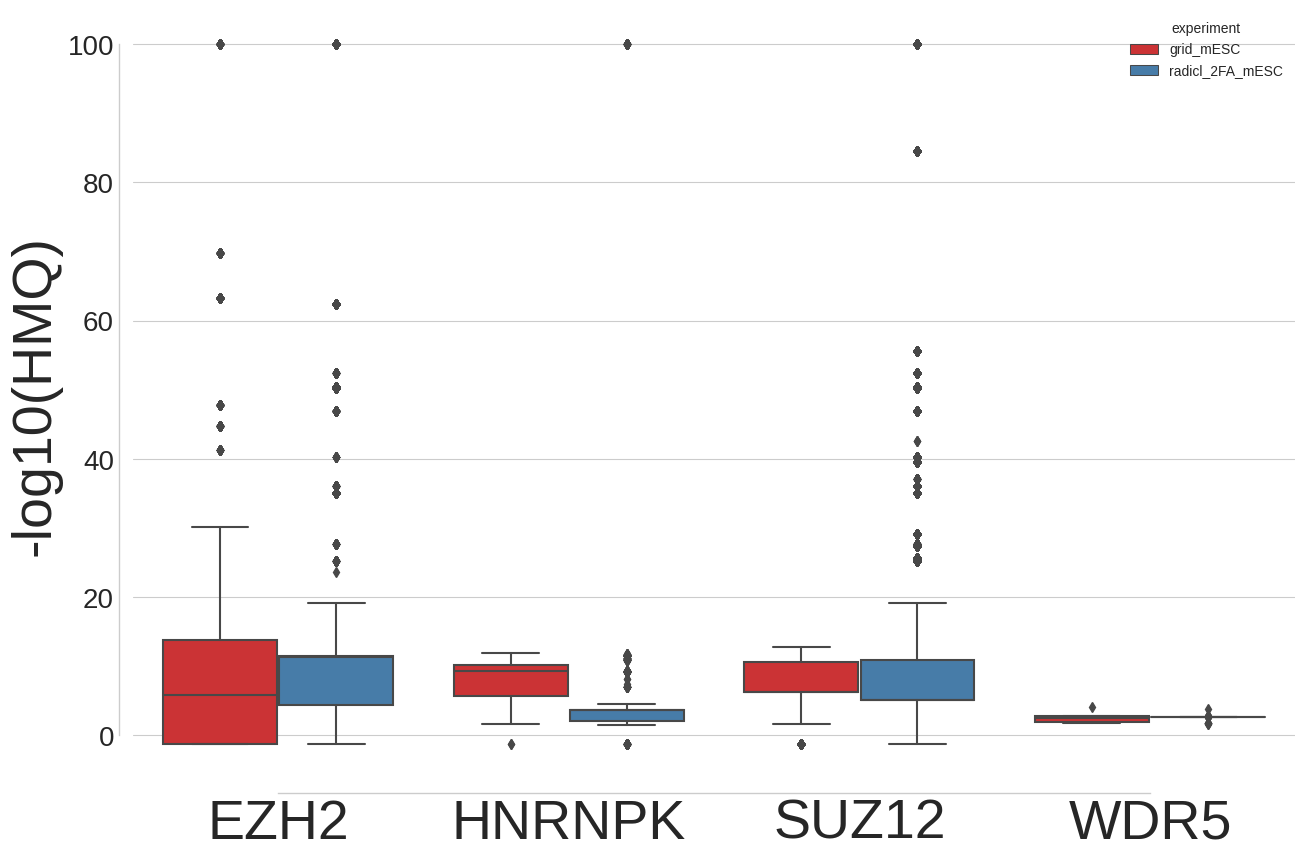

In [4]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(15,10))
sns.boxplot(x="protein", y="-log10HMQ",
            hue="experiment", palette="Set1",
            data=draw_hmqs)
sns.despine(offset=10, trim=True)
plt.xticks(fontsize=40)
plt.yticks(fontsize=20)
plt.xlabel("")
plt.ylabel("-log10(HMQ)", fontsize=40)

## Scaling

In [5]:
dfl = [ezh2_grid, ezh2_rad, hnrnpk_grid, hnrnpk_rad, suz12_grid, suz12_rad, wdr5_grid, wdr5_rad]
draw_hmqs = pd.concat(dfl).loc[:, ["scaling_weight", "experiment", "protein"]]

#draw_hmqs["-log10HMQ"] = draw_hmqs.HMQ.apply(lambda x: - np.log10(x))
draw_hmqs

,scaling_weight,experiment,protein
0,0.815827,grid_mESC,EZH2
1,0.821132,grid_mESC,EZH2
2,0.709244,grid_mESC,EZH2
3,0.715717,grid_mESC,EZH2
4,0.724039,grid_mESC,EZH2
...,...,...,...
418,2.273035,radicl_2FA_mESC,WDR5
419,2.182516,radicl_2FA_mESC,WDR5
420,2.255435,radicl_2FA_mESC,WDR5
421,2.398756,radicl_2FA_mESC,WDR5


Text(0, 0.5, 'Scaling weight')

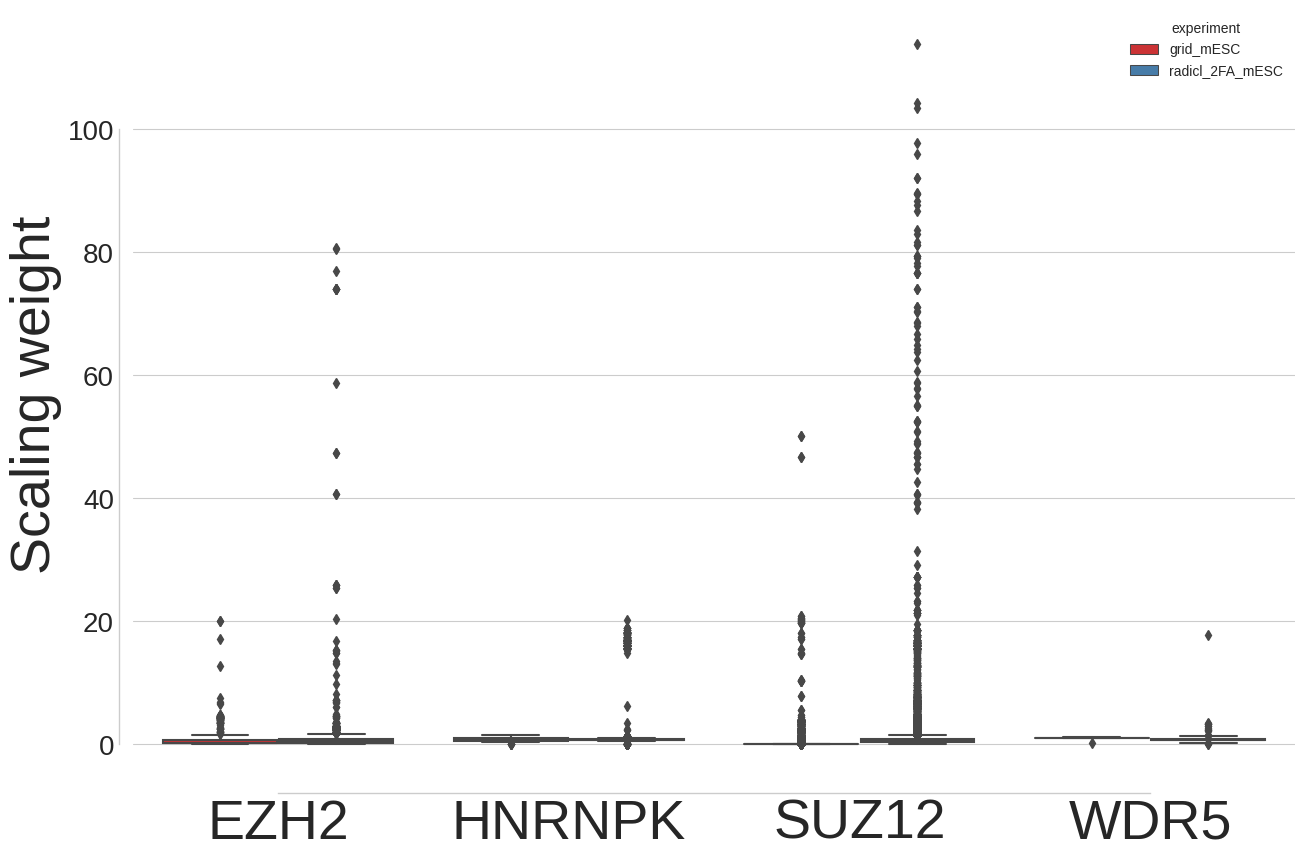

In [6]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(15,10))
sns.boxplot(x="protein", y="scaling_weight",
            hue="experiment", palette="Set1",
            data=draw_hmqs)
sns.despine(offset=10, trim=True)
plt.xticks(fontsize=40)
plt.yticks(fontsize=20)
plt.xlabel("")
plt.ylabel("Scaling weight", fontsize=40)

## Common RNA

In [13]:
ezh2_rad_rna = []
ezh2_grid_rna = []
hnrnpk_rad_rna = []
hnrnpk_grid_rna = []
suz12_rad_rna = []
suz12_grid_rna = []
wdr5_rad_rna = []
wdr5_grid_rna = []
with open("RNA_list/EZH2.grid.bed", 'r') as frip_inp:
    for line in frip_inp:
        ezh2_grid_rna.append(line.strip())
with open("RNA_list/EZH2.radicl.bed", 'r') as frip_inp:
    for line in frip_inp:
        ezh2_rad_rna.append(line.strip())
with open("RNA_list/HNRNPK.grid.bed", 'r') as frip_inp:
    for line in frip_inp:
        hnrnpk_grid_rna.append(line.strip())
with open("RNA_list/HNRNPK.radicl.bed", 'r') as frip_inp:
    for line in frip_inp:
        hnrnpk_rad_rna.append(line.strip())
with open("RNA_list/SUZ12.grid.bed", 'r') as frip_inp:
    for line in frip_inp:
        suz12_grid_rna.append(line.strip())
with open("RNA_list/SUZ12.radicl.bed", 'r') as frip_inp:
    for line in frip_inp:
        suz12_rad_rna.append(line.strip())
with open("RNA_list/WDR5.grid.bed", 'r') as frip_inp:
    for line in frip_inp:
        wdr5_grid_rna.append(line.strip())
with open("RNA_list/WDR5.radicl.bed", 'r') as frip_inp:
    for line in frip_inp:
        wdr5_rad_rna.append(line.strip())

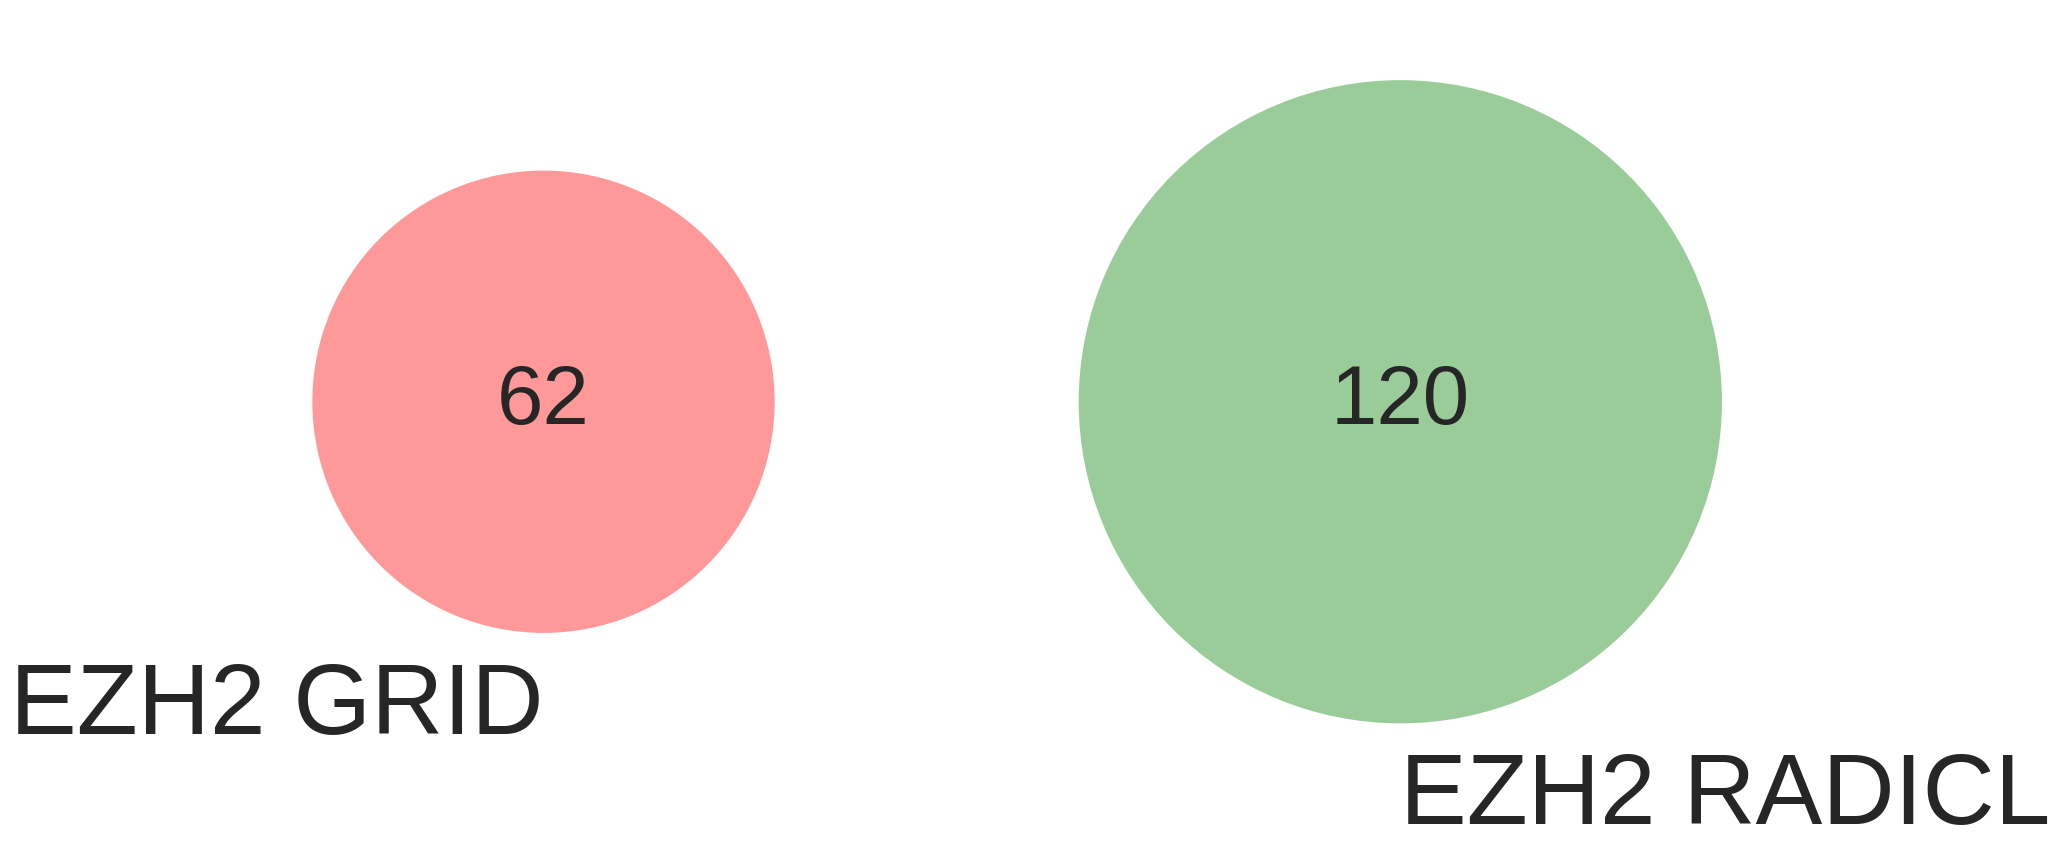

In [19]:
from matplotlib_venn._venn2 import venn2
import matplotlib
plt.figure(figsize=(20,20))
f = {'size'   : 60, 'weight':'normal'}
matplotlib.rc('font', **f)

fst = ezh2_grid_rna
snd = ezh2_rad_rna

venn2(subsets = (len(set(fst).difference(set(snd))), len(set(snd).difference(set(fst))),
                 len(set(fst).intersection(set(snd)))),
      set_labels = ("EZH2 GRID", "EZH2 RADICL"))
plt.savefig("/home/daniil/Desktop/Common_RNA_rad_grid_EZH2.pdf")

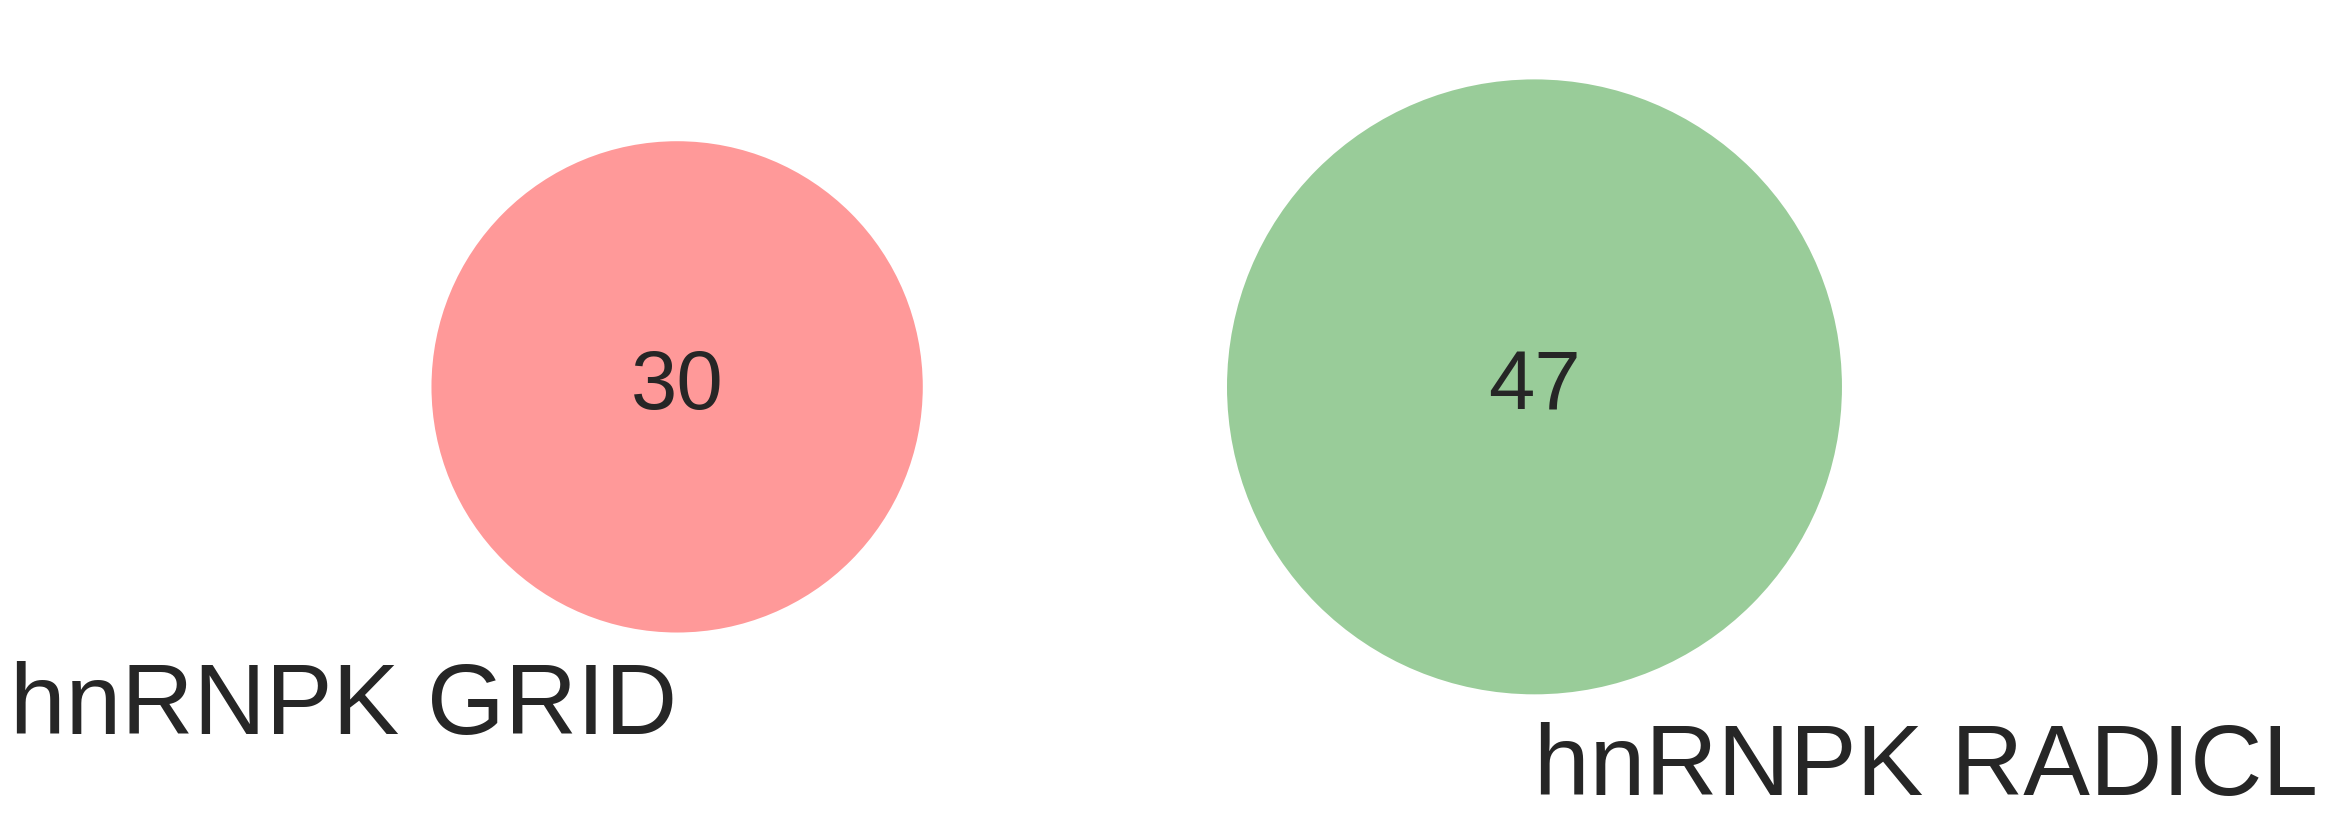

In [20]:
from matplotlib_venn._venn2 import venn2
import matplotlib
plt.figure(figsize=(20,20))
f = {'size'   : 60, 'weight':'normal'}
matplotlib.rc('font', **f)

fst = hnrnpk_grid_rna
snd = hnrnpk_rad_rna

venn2(subsets = (len(set(fst).difference(set(snd))), len(set(snd).difference(set(fst))),
                 len(set(fst).intersection(set(snd)))),
      set_labels = ("hnRNPK GRID", "hnRNPK RADICL"))
plt.savefig("/home/daniil/Desktop/Common_RNA_rad_grid_HNRNPK.pdf")

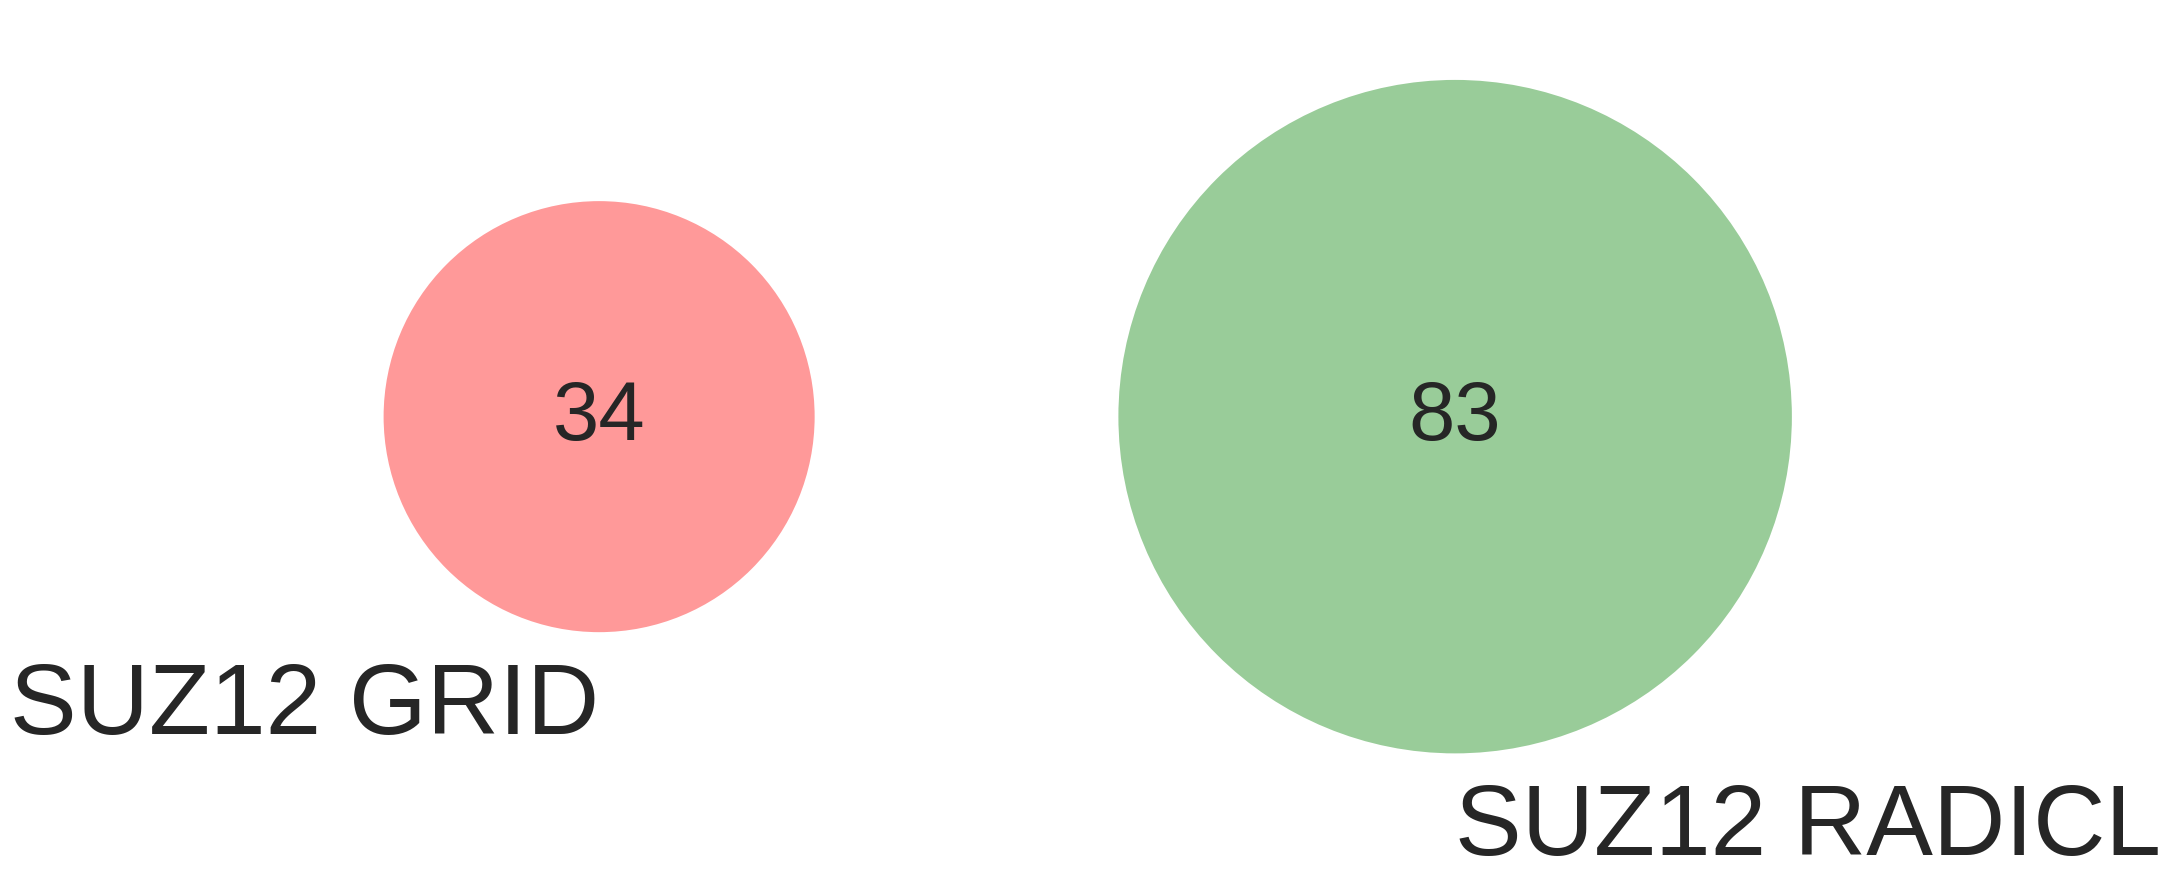

In [21]:
from matplotlib_venn._venn2 import venn2
import matplotlib
plt.figure(figsize=(20,20))
f = {'size'   : 60, 'weight':'normal'}
matplotlib.rc('font', **f)

fst = suz12_grid_rna
snd = suz12_rad_rna

venn2(subsets = (len(set(fst).difference(set(snd))), len(set(snd).difference(set(fst))),
                 len(set(fst).intersection(set(snd)))),
      set_labels = ("SUZ12 GRID", "SUZ12 RADICL"))
plt.savefig("/home/daniil/Desktop/Common_RNA_rad_grid_SUZ12.pdf")

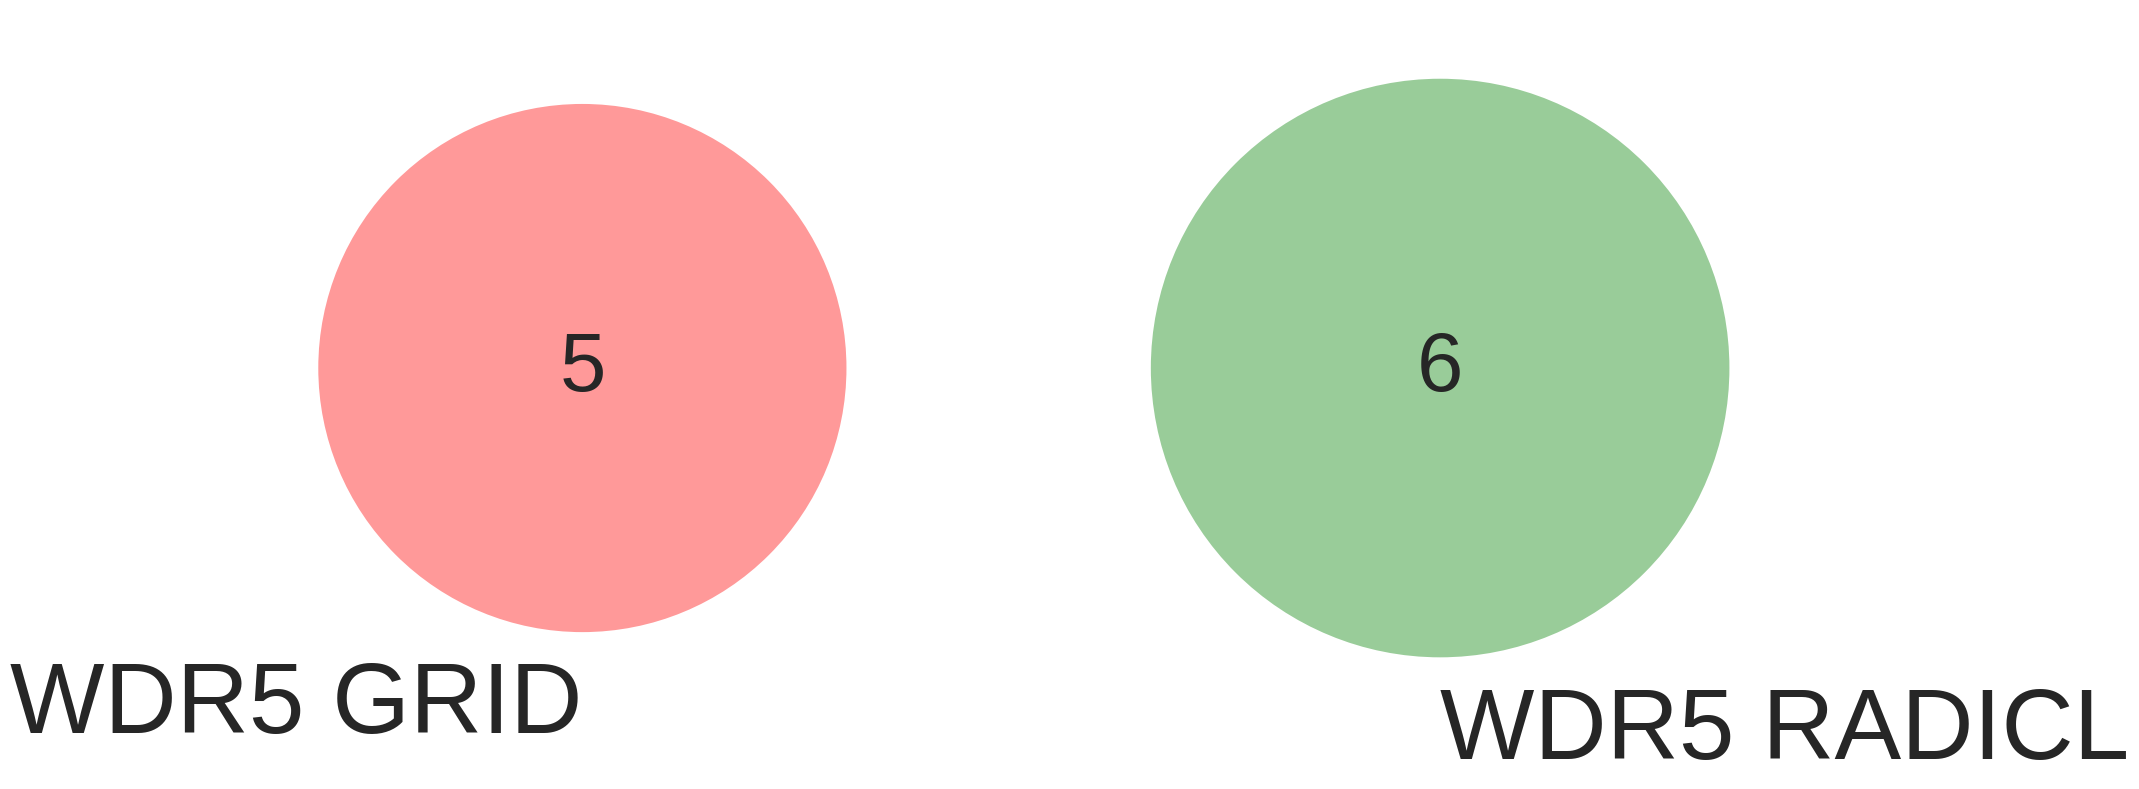

In [22]:
from matplotlib_venn._venn2 import venn2
import matplotlib
plt.figure(figsize=(20,20))
f = {'size'   : 60, 'weight':'normal'}
matplotlib.rc('font', **f)

fst = wdr5_grid_rna
snd = wdr5_rad_rna

venn2(subsets = (len(set(fst).difference(set(snd))), len(set(snd).difference(set(fst))),
                 len(set(fst).intersection(set(snd)))),
      set_labels = ("WDR5 GRID", "WDR5 RADICL"))
plt.savefig("/home/daniil/Desktop/Common_RNA_rad_grid_WDR5.pdf")

## Zscores

In [5]:
radicl_chp = pd.read_table("../09_fRIP_v_eCLIP/ES_radicl_rnaseqMENCODE.chP.tab")
radicl_chp["experiment"] = "radicl_2FA_mESC"
radicl_chp = radicl_chp.iloc[:, [0,9,13]]
grid_chp = pd.read_table("../09_fRIP_v_eCLIP/ES_grid_rnaseqMENCODE.chP.tab")
grid_chp["experiment"] = "grid_mESC"
grid_chp = grid_chp.iloc[:, [0,9,13]]
chp_df = pd.concat([radicl_chp, grid_chp])
chp_df

,gene_name_un,zscore,experiment
0,1110002O04Rik,0.461193,radicl_2FA_mESC
1,1600012P17Rik,1.453865,radicl_2FA_mESC
2,1700001G17Rik,-1.157874,radicl_2FA_mESC
3,1700003I22Rik,1.900422,radicl_2FA_mESC
4,1700007P06Rik,1.094387,radicl_2FA_mESC
...,...,...,...
54887,Xrna_chrY_90772823_ES,2.995746,grid_mESC
54888,Xrna_chrY_90772920_ES,4.553274,grid_mESC
54889,Xrna_chrY_90825258_ES,-0.325844,grid_mESC
54890,Zfy1,-2.518583,grid_mESC


In [11]:
dfl = [ezh2_grid, ezh2_rad, hnrnpk_grid, hnrnpk_rad, suz12_grid, suz12_rad, wdr5_grid, wdr5_rad]
contacts = pd.concat(dfl)

In [12]:
zscore_data = contacts.merge(chp_df, left_on=["rna_name", "experiment"], 
                         right_on=["gene_name_un", "experiment"], how='inner')
zscore_data

,dna_chr,dna_start,dna_end,rna_chr,rna_start,rna_end,rna_strand,rna_name,rna_type,bardic_pval,...,piranha_pval,piranha_qval,dna_intersect,rna_intersect,scaling_weight,HMQ,experiment,protein,gene_name_un,zscore
0,chr10,116587781,116587803,chr14,48695981,48696001,+,Gm25380,snRNA,4.770243e-02,...,9.368450e-13,1.807471e-12,22,20,0.815827,5.422413e-12,grid_mESC,EZH2,Gm25380,6.015093
1,chr11,3168024,3168047,chr14,48695981,48696001,+,Gm25380,snRNA,2.877387e-01,...,9.368450e-13,1.807471e-12,23,20,0.060490,5.422413e-12,grid_mESC,EZH2,Gm25380,6.015093
2,chr13,38152818,38152840,chr14,48695981,48696001,+,Gm25380,snRNA,7.221864e-02,...,9.368450e-13,1.807471e-12,22,20,0.768263,5.422413e-12,grid_mESC,EZH2,Gm25380,6.015093
3,chr14,70521424,70521447,chr14,48695981,48696001,+,Gm25380,snRNA,6.586476e-02,...,9.368450e-13,1.807471e-12,23,20,1.175730,5.422413e-12,grid_mESC,EZH2,Gm25380,6.015093
4,chr14,70521424,70521447,chr14,48695981,48696001,+,Gm25380,snRNA,6.586476e-02,...,9.368450e-13,1.807471e-12,23,20,1.175730,5.422413e-12,grid_mESC,EZH2,Gm25380,6.015093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385079,chr14,45750571,45750597,chr6,13893961,13893988,+,1110019D14Rik,lincRNA,2.725236e-02,...,2.943570e-03,5.004827e-03,26,27,1.503070,1.453902e-02,radicl_2FA_mESC,WDR5,1110019D14Rik,0.946072
385080,chr17,29492456,29492482,chr17,47334308,47334335,+,Trerf1,processed_transcript,1.902328e-01,...,3.718330e-03,5.841987e-03,26,27,0.579929,1.713036e-02,radicl_2FA_mESC,WDR5,Trerf1,0.404145
385081,chr17,46783425,46783451,chr17,47334375,47334402,+,Trerf1,processed_transcript,6.877229e-02,...,3.718330e-03,5.841987e-03,26,27,0.021502,1.693799e-02,radicl_2FA_mESC,WDR5,Trerf1,0.404145
385082,chr17,48670325,48670351,chr17,47334564,47334590,+,Trerf1,processed_transcript,1.031096e-07,...,3.718330e-03,5.841987e-03,26,26,0.121330,1.708441e-04,radicl_2FA_mESC,WDR5,Trerf1,0.404145


Text(0, 0.5, 'Scaling weight')

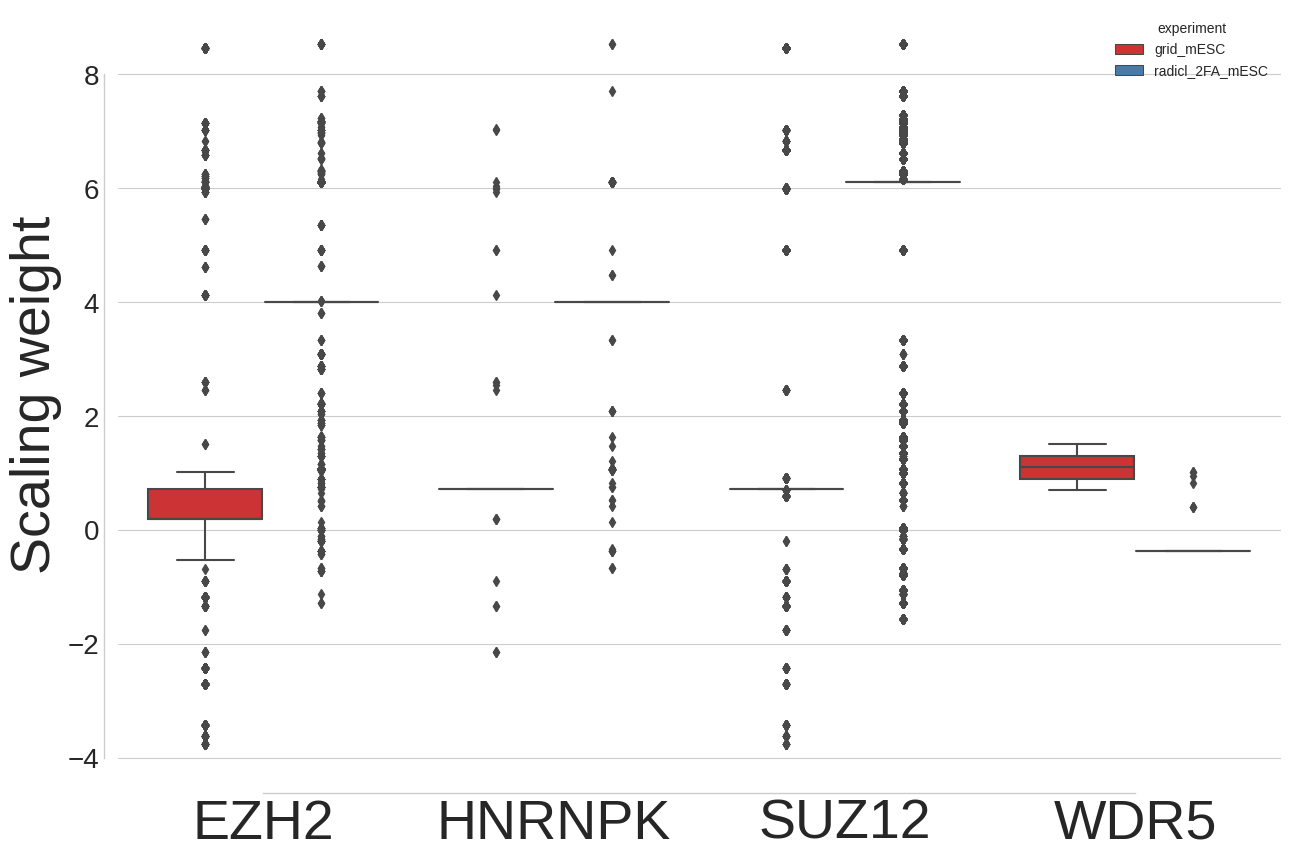

In [13]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(15,10))
sns.boxplot(x="protein", y="zscore",
            hue="experiment", palette="Set1",
            data=zscore_data)
sns.despine(offset=10, trim=True)
plt.xticks(fontsize=40)
plt.yticks(fontsize=20)
plt.xlabel("")
plt.ylabel("Scaling weight", fontsize=40)